### CS484/684 Computational Vision

# Homework Assignment 0

This assignment is a teaser/refresher on calculus, linear algebra, and includes exercises on lenses, image gradients, point processing, and harris corners. It also introduces you to jupiter notebook enviroment and python. Notebook environment allows you to combine cells with python code and cells with text (markdown cells). Text cells can include "latex" mathematical formulas. Such formulas can be written in the inline mode, for example, $(x+y)^2=x^2+2xy+y^2$. Important or longer formulas may look better in a show mode, e.g. $$1=\sum_{n=1}^{\infty}\left(\frac{1}{2}\right)^n.$$ 
Latex is commonly used for scientific writing and you should use it for the written parts of your assignments. You should use text cells (markdown cells) to answer written questions or to present your explanations/comments in notebook reports with code. A list of common mathematical symbols in latex can be easily found online (e.g. https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols). You can also find many online resources explaining latex for matematical equations, e.g. https://en.wikibooks.org/wiki/LaTeX/Advanced_Mathematics.

C:\Users\HP\AppData\Local\Temp\ipykernel_26188\875255336.py:14: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  im = misc.face()     # a sample image in misc library


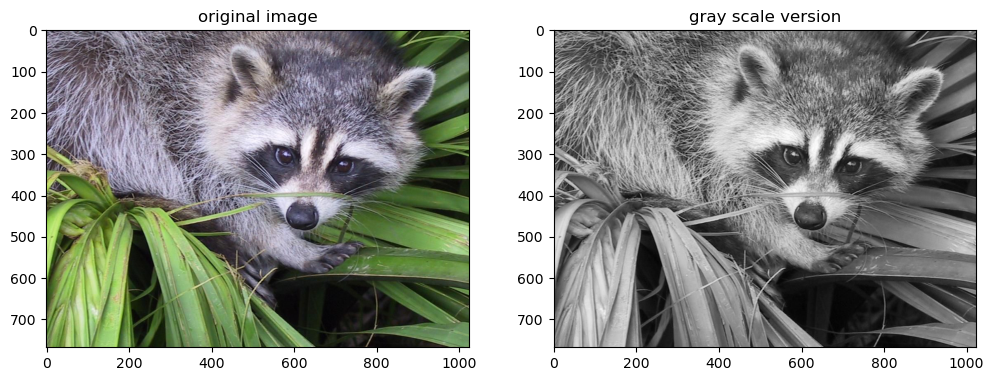

In [141]:
# This cell loads some libraries and a test image you can use. Feel free to load your own images
# but you must save them in "images" subdirectory before creating .zip for your submission.

%matplotlib inline
                     # NOTE: all "magic" options for backend plotting are: inline, notebook, and "external" (default) 
                     # see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details
import numpy as np
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt
from scipy import misc
from skimage.color import rgb2gray

im = misc.face()     # a sample image in misc library
#im=image.imread("../images/IMG_3306.jpg") # another image (loaded from your file), uncomment one 

plt.figure(1,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(rgb2gray(im),cmap="gray")
plt.title("gray scale version")
plt.show()

# Problem 1 [image transform: from color to grey]

#####  Use the following three cells to write your own python functions that take an arbitrary RGB image and outputs its greyscale version. The functions' input should be an RGB image. The computed greyscale image should be a 2D array of the same size as the input image. You should write your own code for converting colored images to greyscale images without using any standard functions like $rgb2gray$ from "skimage" in the cell above, or any other image library for python.  Treat greyscale value as an $average$ of the corresponding R G and B values. You should write three versions A, B, and C, as detailed in each cell below. 

In [142]:
# Solution A: (for-loops)
# In this version you should explicitly use two nested for-loops traversing individual pixels 
# of the input image, computing the average of R, G, and B values for each pixel, and copying them
# to the corresponding element of the output matrix (gray-scale image).
def toGrayScale_A(color_image):
    new_img = np.zeros((color_image.shape[0], color_image.shape[1]))
    for i in range(color_image.shape[0]):
        for j in range(color_image.shape[1]):
            new_img[i][j] = (color_image[i][j][0]/3 + color_image[i][j][1]/3 + color_image[i][j][2]/3)
    return new_img


In [143]:
# Solution B: (basic numpy operators for matrix operations)
# In the next two versions you can't use for-loops (or other loops) explicitly traversing pixels. 
# In B below you should first separate image colors into individual 2D arrays (matrices) R,G and B 
# using "slicing" or "reshaping" (e.g. see Filtering.ipynb in Code/Samples - course web page) 
# and then compute the average of these matrices 0.3333*(A+B+C) directly using numpy operators + and * 
# for adding and scaling matrices. HINT: your code can look like linear algebraic expresion above.
def toGrayScale_B(color_image):
    new_img = (color_image[:, :, 0]/3 + color_image[:, :, 1]/3 + color_image[:, :, 2]/3)
    return new_img


In [144]:
# Solution C: (vectorized functions)
# In this version you should use numpy function 'dot' applying it 
# directly to colored image (3d array) and vector [0.33,0.33,0.33] defining weights 
# for each color component. 
def toGrayScale_C(color_image):
    return np.dot(color_image[:, :, :], [1/3, 1/3, 1/3])


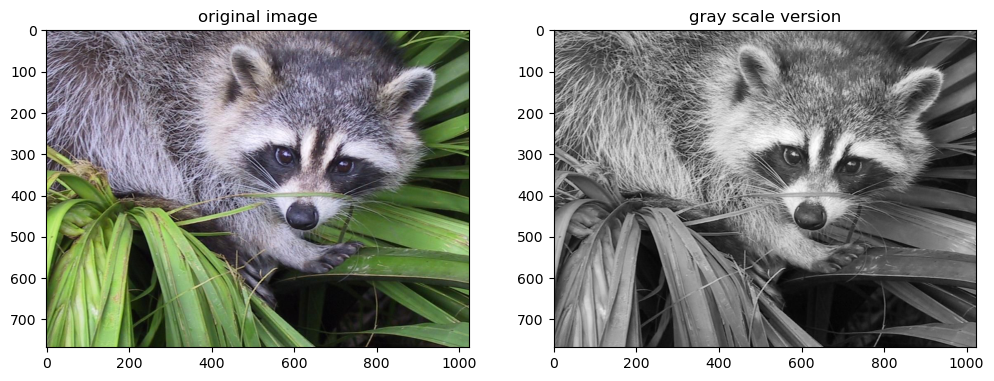

CPU times: total: 3.23 s
Wall time: 6.49 s


In [145]:
%%time
# Test your code for version A in this cell.
plt.figure(2,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_A(im),cmap="gray")
plt.title("gray scale version")
plt.show()

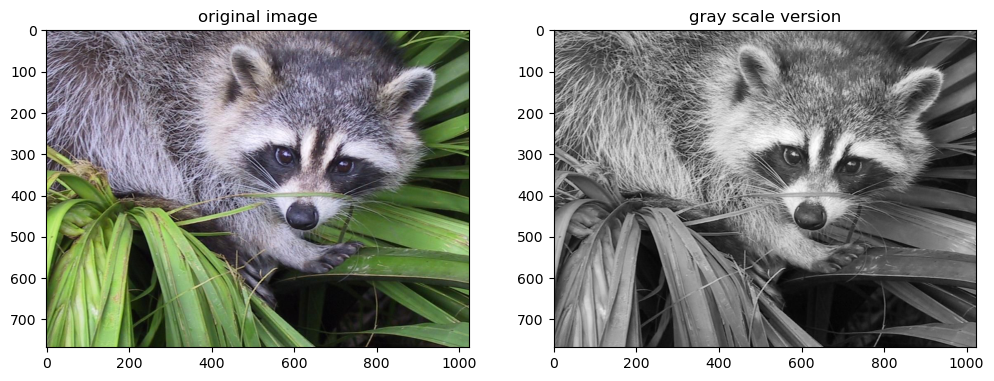

CPU times: total: 422 ms
Wall time: 601 ms


In [146]:
%%time
# Test your code for version B in this cell.
plt.figure(3,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_B(im),cmap="gray")
plt.title("gray scale version")
plt.show()

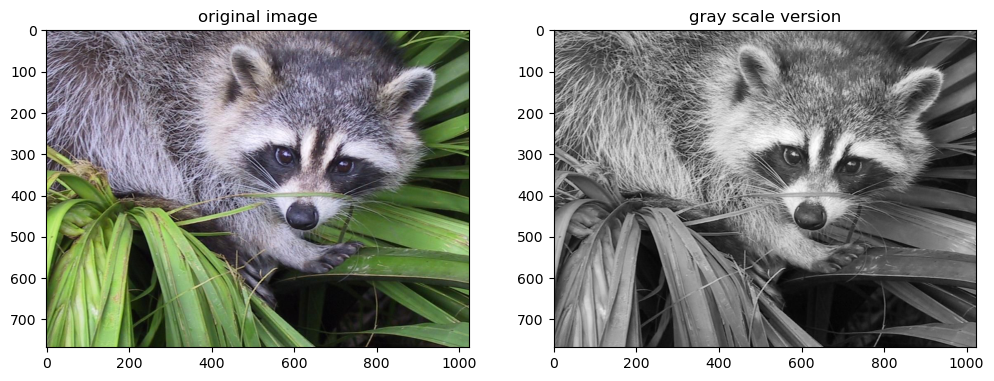

CPU times: total: 328 ms
Wall time: 865 ms


In [147]:
%%time
plt.figure(4,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(toGrayScale_C(im),cmap="gray")
plt.title("gray scale version")
plt.show()

##  ATTENTION: problem 1 should teach you NEVER to use for-loops (or other explicit loops) when coding operations over image pixels or, more generally, matrix elements! Compare the running times reported in the last three cells and decide for yourself what would happen if the image was much larger and you had to run your code on many images. <font color=red> Later in this course, your marks will be significantly reduced if your code explicitly traverses matrix elements. Numpy was designed to avoid that type of code. </font> You should always use basic 'numpy' operators for matrices that make your code both efficient and simple. <font color=red> In many cases, numpy's code should look exactly like linear algebraic equations.</font> When basic linear algebraic operators are not enough, you should look for appropriate "vectorized" functions (e.g. like 'dot'). We will often provide hints on specific vectorized functions that can be helpful. Learning how to use vectorized functions is significant for proper numpy coding. You should also get comfortable with "slicing" and "reshaping" operations as soon as possible - they are ubiquitous in numpy and critical for effective code.

# Problem 2 [pixel shuffling]

##### Write code that randomly shuffles all image pixels using function numpy.random.shuffle. Show some test case (original image and result). Display the histograms of both the original and the "shuffled" images.

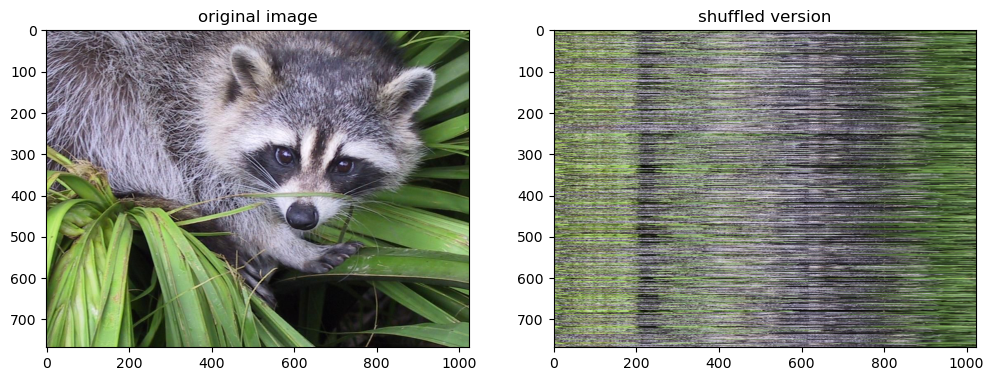

In [148]:
# Solution: write your code in this cell. Show one image and a result of shuffling. 
%matplotlib inline
import copy as cp

shuffled_img = cp.deepcopy(im)
np.random.shuffle(shuffled_img[:, :])

plt.figure(5,figsize = (12, 8))
plt.subplot(121)
plt.imshow(im)
plt.title("original image")
plt.subplot(122)
plt.imshow(shuffled_img,cmap="gray")
plt.title("shuffled version")

plt.show()

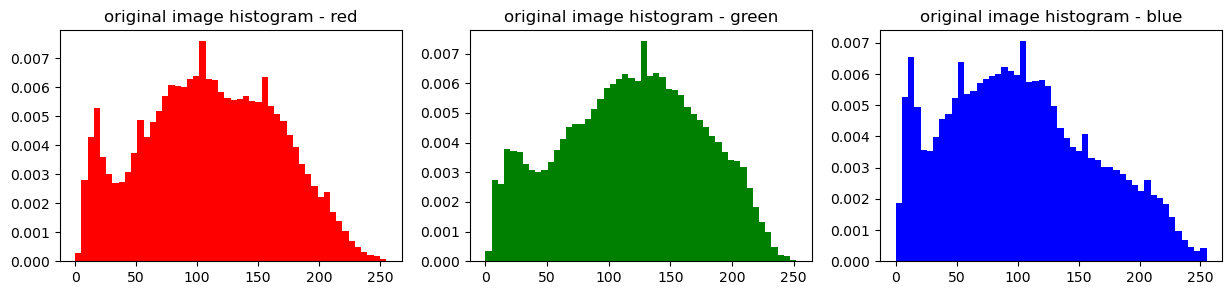

In [149]:
%matplotlib inline
plt.figure(6, figsize=(15,3))
plt.subplot(131)
plt.hist(im[:, :, 0].flatten(), bins=50, density=True, color="red")
plt.title("original image histogram - red")

plt.subplot(132)
plt.hist(im[:, :, 1].flatten(), bins=50, density=True, color="green")
plt.title("original image histogram - green")

plt.subplot(133)
plt.hist(im[:, :, 2].flatten(), bins=50, density=True, color="blue")
plt.title("original image histogram - blue")
plt.show()

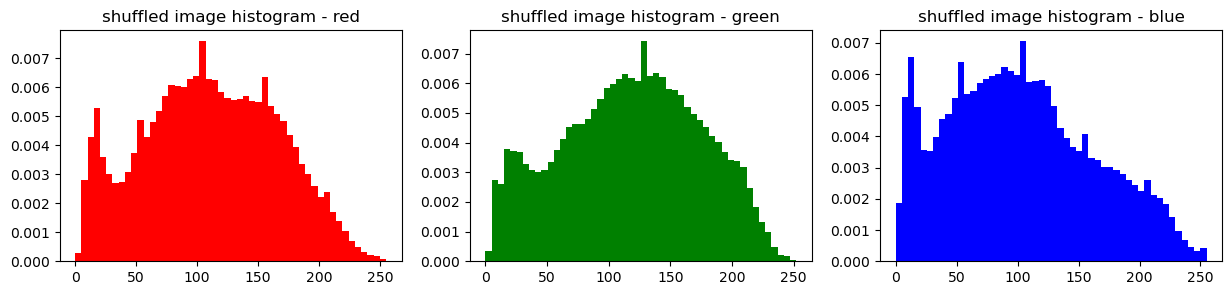

In [150]:
%matplotlib inline
plt.figure(7, figsize=(15,3))
plt.subplot(131)
plt.hist(shuffled_img[:, :, 0].flatten(), bins=50, density=True, color="red")
plt.title("shuffled image histogram - red")

plt.subplot(132)
plt.hist(shuffled_img[:, :, 1].flatten(), bins=50, density=True, color="green")
plt.title("shuffled image histogram - green")

plt.subplot(133)
plt.hist(shuffled_img[:, :, 2].flatten(), bins=50, density=True, color="blue")
plt.title("shuffled image histogram - blue")
plt.show()

# Problem 3 [distance to hyperplane]

##### Assume that a hyperplane in n-dimensional Euclidean space ${\cal R}^n$ is defined by equation $w_0+w\cdot x = 0$ where $x\in{\cal R}^n$ are points on the hyperplane. Assume that  scalar $w_0\in{\cal R}$ and vector $w=(w_1,\dots,w_n)$ are given hyperplane parameters. Derive a formula for a distance $d(x)$ between an arbitrary point $x\in {\cal R}^n$ and the hyperplane (i.e. the distance between $x$ and the closest point on the hyperplane). Your solution should be expressed in terms of $x$, $w$, and $w_0$. If it is easier, you can get partial credit by focusing on $n=2$ (line in 2D) or $n=3$ (plane in 3D). For full credit, the formula should be linear-algebraic expression that works for arbitrary $n$.

Solution: (show your work in this "Markdown" cell using basic text and latex for formulas, make sure you "run" this and other text or code cells before saving your notebook for submission so that it is easy to read and evaluate your writings and results). You can add empty lines to create new paragraphs in text (markdown) cells, as here...

My solution is:
 
Let $X\in {\cal R}^n$ be used to define a point in the plane s.t. $w_0+w\cdot x = 0$. Then,
$$\begin{equation} 
d(x) = || proj_w(x - X) || 
     = || \frac {(x-X)\cdot w}{w\cdot w}w ||
     = \frac {|x\cdot w - X\cdot X|}{||w||^2}||w||
     = \frac {|x\cdot w - (-w_0)|}{||w||}
     = \frac {|x\cdot w + w_0|}{||w||}
\end{equation}$$



Use only latex formulas and plain text (no boldface or ### heading) in your solutions so that it is easier to distinguish your work from the provided problem statements. However, if necessary, you can insert additional cells, if that helps the structure your solution. 

Do not change the order of the problems. Once you completed all written and code cells, run $$\text{Kernel->Restart & Run All}$$ to generate a final "gradable" version of your notebook and save your ipynb file. Also use $$\text{File->Print Preview}$$ and then print your report from your browser into a pdf file. Submit both .pdf and .ipynb files.

# Problem 4 [lens properties]

##### As stated in the lectures (topic 2), assuming fixed "image distance" a lens generates perfectly sharp image only for 3D points at some particular depth. Assuming an object has sharp image when image distance is $h$ and that the focal length of the lens  $f$  is known, what is the object’s depth $$d(h) = ?$$ Your solution should show your derivation. 
##### HINT: Use the illustration below to find similar triangles and to identify where the focal length $f$ of the lens is relevant. <img src="images/fig for problem_4.png">

Solution: (use text and latex formulas to justify/explain. Feel free to replace an image above with a modified version including your scribbles.)

Let the triangle composed by d and the object be defined with the angle $\theta$ s.t. 
$\begin{equation} tan\theta = \frac{obj}{d} \end{equation}$

Then, there exists a triangle with the same angle formed by h and the object image (reference the image from C to object's image)
$\begin{equation} tan\theta = \frac{obj_img}{h} \end{equation}$

Now, using the diagonal ray from d, the following triangles can be constructed
$\begin{equation} tan\phi = \frac{f}{obj} = \frac{h-f}{obj_img}\end{equation}$

Combining the above equations, we get,
$\begin{equation} d(h) = \frac{dh}{h-f} \end{equation}$


# Problem 5 [derivatives and gradients]

##### (a) Find all points $x\in R^1$ corresponding to local extrema of function $f(x) = -5x^3 + 2x^2 + 3x$. Show your derivation.

Solution: (write your solution in this cell)

##### (b) Consider the following function of two variables $f(x,y) = \frac{1}{3}yx^2 - xy^2+3y$ and find all points with zero gradient $\nabla f = 0$ (extrema/saddle points). HINT: find all solutions $(x,y)\in R^2$ to the following system of equations $$\left\{\begin{align} \frac{\partial f}{\partial x} & =  0 \\  \frac{\partial f}{\partial y}  & =  0 \end{align}  \right.$$

Solution: (write your solution in this cell)

##### (c) Use "matplotlib" to display a 3D plot for function f(x,y). You should do this over the domain that includes all extrema points. Write your code in the cell below. Make sure you "run" the cell with your code below before saving and submitting your notebook. This will make your plot (the output of your code) visible when the notebook is opened for grading.

Text(0.5, 0, 'z')

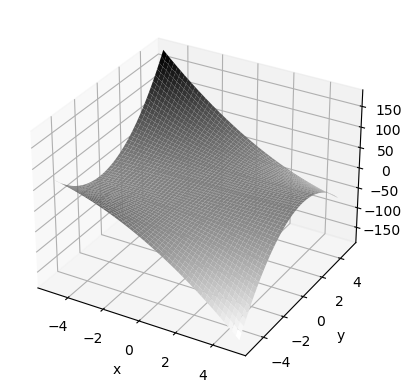

In [151]:
# Solution: write your code in this cell
%matplotlib inline
#notebook
# NOTE: unlike "inline" mode activated in earlier cells, "notebook" allows interactive plots

def f(x, y):
    return y * x ** 2 / 3 - x * y ** 2 + 3 * y

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(8)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


##### (d) Visualize vector field of gradients for $f(x,y)$ over the same domain. See one of the posted demo notebooks for inspiration.

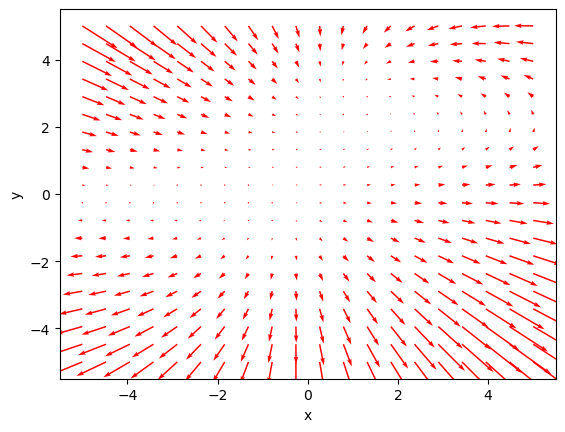

In [152]:
# Solution: write your code in this cell
# HINT: no need to repeat declaration ""%matplotlib notebook" if this cell is run after previous one.
%matplotlib inline    
def f(x, y):
    return y * x ** 2 / 3 - x * y ** 2 + 3 * y

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

# U0, V0 = grad_f(X, Y)
U0, V0 = np.gradient(Z)
Z0 = np.zeros_like(X)
fig = plt.figure(9)
ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.quiver(X, Y, X+U0, Y+V0, color='r')
plt.show(fig)


# Problem 6 [median filtering]

##### Prove that median filtering in not a linear image transormation. HINT: find a counter example showing that for some vectors of the same dimensions $A$ and $B$, $$Med(A + B)\neq Med(A) + Med(B)$$  where operation $Med(X)$ returns median of the elements of vector $X$.

Solution: (write your solution in this cell)

# Problem 7 [image differentiation and noise]

##### (a) Image differentiation: Write your own code for a python function estimating partial derivatives $d(x,y):=\frac{\partial}{\partial x} f(x,y)$ of any greyscale image $f$ with respect to variable $x$. The function should return a real-valued matrix of the same size as the input image $f$. Use the "backward" difference approximation $$\frac{\partial}{\partial x} f(x,y)\approx \frac{f(x,y)-f(x-\Delta,y)}{\Delta}$$ where $\Delta$ is the distance between pixels (you  can assume  $\Delta=1$). You are not allowed to use colvolution (as in the sample notebook "convolution.ipynb"). <font color=red> GENERAL NOTE ON NUMPY: as mentioned earlier, your numpy code should not use (double) for-loops for traversing the elsements of matrices. This is highly inefficient. You should learn to use appropriate numpy functions that avoid this. </font> For example, for this excercise you can use numpy.roll to compute image with pixels shifted to the left or right and use linear operations over images as matrices (pointwise addition/subtraction).

Text(0.5, 1.0, 'original image')

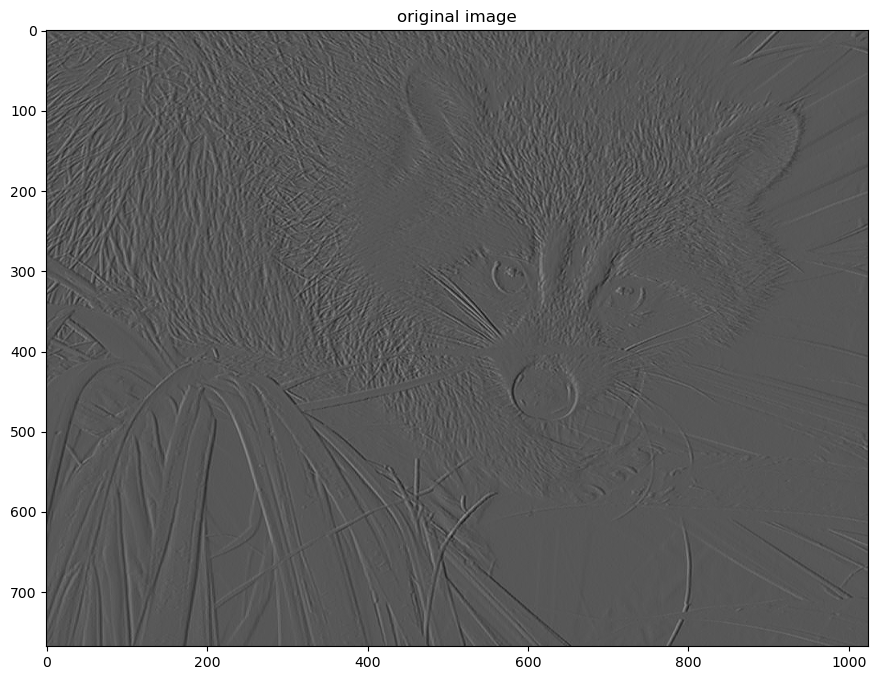

In [153]:
# Solution: write your code in this cell
import copy as cp
og_gray = toGrayScale_C(im)
diff_img = toGrayScale_C(im)
for i in range(im.shape[1]):
    if i == 0:
        pass
    diff_img[:, i] -= og_gray[:, i - 1]

plt.figure(11, figsize = (12, 8))
plt.imshow(diff_img, cmap="gray")
plt.title("original image")

##### (b): Apply your code in (a) to some grey-scale image $f$. Display the following images: the original image $f$ and its derivative $g=\frac{\partial}{\partial x} f$ (real-valued). Your matplotlib plots for $f$ abd $g$ should include the "color bar" clearly indicating the corresponding ranges. 
NOTE: to display real-valued matrix with negative and positive values as some image, matplotlib can use some (typically linear) range transformation or point processing that maps the whole range of the matrix values onto an interval of grey-scale intensities, e.g. [0,255]. The color bar can illustrate such transofrmation showing which real-values in the matrix range correspond to different grey-levels in the displayed image. You can expect that for the matrix of derivatives $g$ the medium grey-level (125) would correspond to zero derivatives, while the negative derivatives are displayed by darker intensities [0,125], and positive derivatives are displayed by brighter intensities [125,255]. 

Besides grey-scale [0,255], matplotlib can map the range of a matrix values onto some colors intervals (from red to blue or from brown to yellow), thus the name "color bar". It can also use some non-linear (e.g. logarithmic) range maps that maybe useful for visualizing certain real-valued matrices, e.g. with many extremely small (or large) positive values.

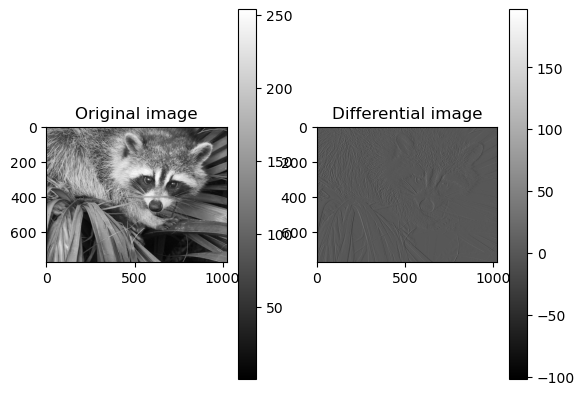

In [154]:
# Solution: write your code in this cell
plt.figure(12)
plt.subplot(121)
plt.imshow(og_gray, cmap="gray")
plt.title("Original image")
plt.colorbar()

plt.subplot(122)
plt.imshow(diff_img, cmap="gray")
plt.title("Differential image")
plt.colorbar()


##### (c) Add different levels of (independent) Gaussian noise to pixels in image $f$ and display such corrupted images together with their derivatives as above. You can use noise generation code from Filtering.ipynb (see code libraries on CS484/684 website).

Text(0.5, 1.0, 'Differential image')

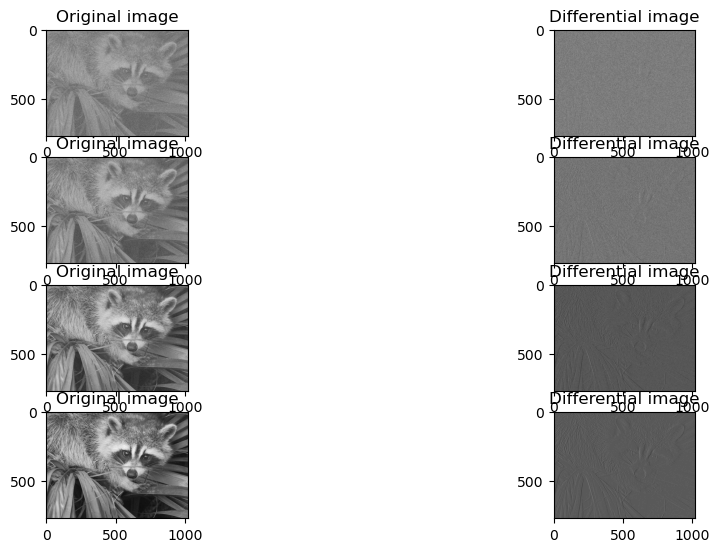

In [155]:
# Solution: write your code in this cell
%matplotlib inline
import copy as cp
og_gray_gauss_1 = np.random.normal(0.0, 80, (og_gray.shape[0], og_gray.shape[1])) + og_gray
diff_img_gauss_1 = np.random.normal(0.0, 80, (diff_img.shape[0], diff_img.shape[1])) + diff_img

og_gray_gauss_2 = np.random.normal(0.0, 40, (og_gray.shape[0], og_gray.shape[1])) + og_gray
diff_img_gauss_2 = np.random.normal(0.0, 40, (diff_img.shape[0], diff_img.shape[1])) + diff_img

og_gray_gauss_3 = np.random.normal(0.0, 15, (og_gray.shape[0], og_gray.shape[1])) + og_gray
diff_img_gauss_3 = np.random.normal(0.0, 15, (diff_img.shape[0], diff_img.shape[1])) + diff_img

og_gray_gauss_4 = np.random.normal(0.0, 5, (og_gray.shape[0], og_gray.shape[1])) + og_gray
diff_img_gauss_4 = np.random.normal(0.0, 5, (diff_img.shape[0], diff_img.shape[1])) + diff_img


plt.figure(18, figsize=(12, 8))
plt.subplot(521)
plt.imshow(og_gray_gauss_1, cmap="gray")
plt.title("Original image")

plt.subplot(522)
plt.imshow(diff_img_gauss_1, cmap="gray")
plt.title("Differential image")

plt.subplot(523)
plt.imshow(og_gray_gauss_2, cmap="gray")
plt.title("Original image")

plt.subplot(524)
plt.imshow(diff_img_gauss_2, cmap="gray")
plt.title("Differential image")

plt.subplot(525)
plt.imshow(og_gray_gauss_3, cmap="gray")
plt.title("Original image")

plt.subplot(526)
plt.imshow(diff_img_gauss_3, cmap="gray")
plt.title("Differential image")

plt.subplot(527)
plt.imshow(og_gray_gauss_4, cmap="gray")
plt.title("Original image")

plt.subplot(528)
plt.imshow(diff_img_gauss_4, cmap="gray")
plt.title("Differential image")



# Problem 8 [Harris corners]

##### (a) In this problem we use $\nabla I (x,y)$ to denote a gradient of image inensities at point $(x,y)$ only to emphasize this dependence of the gradient on location. Assume that $\nabla I (x,y)$  is a non-zero vector at a given point $(x,y)$. What is the rank of matrix $\nabla I(x,y) \cdot \nabla I^T(x,y)$ and why?

Solution: (formal arguments)
$$\begin{equation}
\Delta I(x,y) \Delta I^T(x,y) = \begin{bmatrix} I_x' & I_y' \end{bmatrix} \begin{bmatrix} I_x' \\ I_y' \end{bmatrix} 
= \begin{bmatrix} (I_x')^2 & I_x'I_y' \\ I_x'I_y' & (I_y')^2 \end{bmatrix}
\end{equation}$$

By inspection, the row vectors are multiples of eachother, multiply the top row with $I_y'$ and the bottom row with $I_y'$, then they would be the same. Hence, the Rank is 1.  

##### (b) Assume that an image patch (window $w$) contains a straight intensity edge (as in window $W_b$ below). What should be the rank of Harris matrix  at that patch/window $M_w = \sum_{(x,y)\in w} \nabla I(x,y) \cdot \nabla I^T(x,y)$ and why? 

NOTE: here we assume that $w$ stands for a subset of pixels in the window, rather than 0-1 indicator function for this window (as in the lecture notes). Both types of notation is common. While 0-1 indicators $w(x,y)$ easily extend to weighted support functions, we do not need this generality for this excercise and preferred a slightly simpler set notation. <img src="images/fig for problem_8.png">

Solution:
At a straight intensity edge, the Intensity of one direction would be much larger than the other. With the summation, the gradient vector will be roughly similar for all the pixels in the window. Thus the individual terms will be proportional to each other hence resulting in a Rank 1.

##### (c) What is the rank of Harris matrix for window $W_c$ containing a corner at an intersection of two straight edges? Provide a formal proof. HINT: You can assume that pixels in $W_c$ have either a zero-gradient, or one of two distint gradient vectors corresponding to two straight edges.

Solution:  
Consider vector $v_1$ and $v_2$, 2 distinct vectors which correspond to the 2 straight edges meeting the corner. By definition, the vectors are linearly independant. For each pixel in $W_c$, the resulting gradient can be either the zero-gradient, or $v_1$/$v_2$ per the hint. Calculating the Harris matrix, for the zero-gradient, the resultant will be the zero-matrix. For the gradient vectors $v_1$ and $v_2$, they will be rank-1 matrices. Summing the matrices, there will be atleast 2 rank-1 matrices associated with $v_1$ and $v_2$ such that the sum of the two Harris matrices will result in a matrix with rank 2.